# Stock Price Prediction

Let's say we want to make money by buying stocks.  Since we want to make money, we only want to buy stock on days when the price will go up (we're against shorting the stock).  We'll create a machine learning algorithm to predict if the stock price will increase tomorrow.  If the algorithm says that the price will increase, we'll buy stock.  If the algorithm says that the price will go down, we won't do anything.

We want to maximize our `true positives` - days when the algorithm predicts that the price will go up, and it actually goes go up.  Therefore, we'll be using precision as our error metric for our algorithm, which is `true positives / (false positives + true positives)`.  This will ensure that we minimize how much money we lose with `false positives` (days when we buy the stock, but the price actually goes down).

This means that we will have to accept a lot of `false negatives` - days when we predict that the price will go down, but it actually goes up.  This is okay, since we'd rather minimize our potential losses than maximize our potential gains.

## Method

Before we get to the machine learning, we need to do a lot of work to acquire and clean up the data.  Here are the steps we'll follow:

* Download historical stock prices from Yahoo finance
* Explore the data
* Setup the dataset to predict future prices using historical prices
* Test a machine learning model
* Setup a backtesting engine
* Improve the accuracy of the model

At the end, we'll document some potential future directions we can go in to improve the technique.

## Downloading the data

First, we'll download the data from Yahoo Finance.  We'll save the data after we download it, so we don't have to re-download it every time (this could cause our IP to get blocked).

We'll use data for a single stock (Heineken) from when it started trading to the present.

In [ ]:
# Import finance API and get historical stock data

!pip install yfinance
import requests 
import yfinance as yf
import os
import json
import pandas as pd
import numpy as np


DATA_PATH = "hein_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        hein_hist = pd.read_json(DATA_PATH)
else:
    hein = yf.Ticker("HEIA.AS")
    hein_hist = hein.history(start="2000-01-01", end="2020-12-31", interval="1d")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    hein_hist.to_json(DATA_PATH)

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.linear_model import LogisticRegression
import os,sys
from scipy import stats
from sklearn import metrics
import seaborn as sn
import numpy as np
from datetime import datetime

In [ ]:
hein_hist.index.name="Date"

In [ ]:
hein_hist.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=5404, freq=None)

In [ ]:
hein_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

As we can see, we have one row of data for each day that Microsoft stock was traded.  Here are the columns:

* Open - the price the stock opened at.
* High - the highest price during the day
* Low - the lowest price during the day
* Close - the closing price on the trading day
* Volume - how many shares were traded

Stock doesn't trade every day (there is no trading on weekends and holidays), so some dates are missing.

In [ ]:
print(hein_hist.head(5))
print(hein_hist.tail(5))
print(hein_hist.describe())

                 Open       High        Low  ...   Volume  Dividends  Stock Splits
Date                                         ...                                  
2000-01-03  24.903549  24.980490  24.621429  ...   617080        0.0             0
2000-01-04  24.626564  24.626564  23.390362  ...  2100402        0.0             0
2000-01-05  23.108240  24.236721  23.082592  ...  3871423        0.0             0
2000-01-06  23.646831  25.672969  23.595535  ...  5494813        0.0             0
2000-01-07  25.698623  26.801456  25.698623  ...  5407766        0.0             0

[5 rows x 7 columns]
                 Open       High        Low  ...  Volume  Dividends  Stock Splits
Date                                         ...                                 
2020-12-23  87.133819  87.985161  86.916041  ...  237161        0.0             0
2020-12-24  87.905974  88.757317  87.727786  ...  111236        0.0             0
2020-12-28  88.737514  88.876104  87.727787  ...  225697        0.0  

In [ ]:
#We will choose the best algorithm based on pre/determined KPIs.

In [ ]:
#we will estimate the returns and logaritmic returns and will shift all the date by one day.  

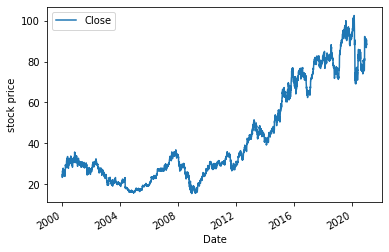

In [ ]:
ax = hein_hist.plot(y=["Close"])
ax.set_ylabel("stock price")
plt.show()

In [ ]:
# we will try to forecast using simple statistical models 

In [ ]:
hein_hist['pct_change'] = hein_hist["Close"].pct_change()

hein_hist['previous_date'] = hein_hist["Close"].shift(1) 

hein_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,previous_date
Date,,,,,,,,,
2000-01-03,24.903549,24.980490,24.621429,24.688112,617080,0.0,0,NaN,NaN
2000-01-04,24.626564,24.626564,23.390362,23.390362,2100402,0.0,0,-0.052566,24.688112
2000-01-05,23.108240,24.236721,23.082592,23.800716,3871423,0.0,0,0.017544,23.390362
2000-01-06,23.646831,25.672969,23.595535,25.395979,5494813,0.0,0,0.067026,23.800716
2000-01-07,25.698623,26.801456,25.698623,25.775564,5407766,0.0,0,0.014947,25.395979


In [ ]:
# We will drop the missing values and estimate the market direction
#we will have 3 variables with the three outcomes 1, 0 and -1, where -1 represents a downward marke, 1 represents an upward market and 0 represents no change. This enables us to use a classifier that can predict the probability of two classes

In [ ]:
hein_hist = hein_hist.dropna()
hein_hist['direction'] = np.sign(hein_hist['pct_change']).astype(int)
hein_hist.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,previous_date,direction
Date,,,,,,,,,,
2000-01-04,24.626564,24.626564,23.390362,23.390362,2100402,0.0,0,-0.052566,24.688112,-1
2000-01-05,23.108240,24.236721,23.082592,23.800716,3871423,0.0,0,0.017544,23.390362,1
2000-01-06,23.646831,25.672969,23.595535,25.395979,5494813,0.0,0,0.067026,23.800716,1
2000-01-07,25.698623,26.801456,25.698623,25.775564,5407766,0.0,0,0.014947,25.395979,1
2000-01-10,26.160273,26.662961,26.062813,26.647573,2987805,0.0,0,0.033831,25.775564,1


In [ ]:
#we will explore the univariate data set using statistical models first. For this purpose we will keep the the close price only

In [ ]:
hein_hist.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,previous_date,direction
Open,1.000000,0.999853,0.999848,0.999719,-0.388328,0.028811,NaN,-0.001743,0.999876,0.022868
High,0.999853,1.000000,0.999793,0.999868,-0.384240,0.028777,NaN,0.007347,0.999744,0.029878
Low,0.999848,0.999793,1.000000,0.999858,-0.392192,0.028608,NaN,0.007255,0.999729,0.030165
Close,0.999719,0.999868,0.999858,1.000000,-0.387934,0.028958,NaN,0.015774,0.999610,0.036829
Volume,-0.388328,-0.384240,-0.392192,-0.387934,1.000000,-0.000983,NaN,0.007863,-0.387630,-0.011615
Dividends,0.028811,0.028777,0.028608,0.028958,-0.000983,1.000000,NaN,0.071170,0.027320,0.049210
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_change,-0.001743,0.007347,0.007255,0.015774,0.007863,0.071170,NaN,1.000000,-0.008381,0.698688
previous_date,0.999876,0.999744,0.999729,0.999610,-0.387630,0.027320,NaN,-0.008381,1.000000,0.018917
direction,0.022868,0.029878,0.030165,0.036829,-0.011615,0.049210,NaN,0.698688,0.018917,1.000000


In [ ]:
#we can see a positive autocorrelation between the yesterday's price and the price of the stock today

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


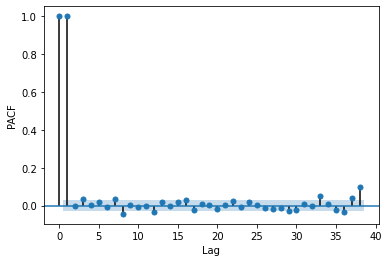

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(hein_hist["Close"])
plt.title("")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

In [ ]:
##There is a strong positive correlation until lag 1; after lag 1, the p-value is less than 0.05

In [ ]:
#therefore, we will add aditional variables for the previous day only. we will not use pct_change as variable 

In [ ]:
#we will do some additinal feature engineering 

In [ ]:
Logreg=hein_hist[['direction','Open','Close']]


In [ ]:
Logreg['Lag1'] = Logreg['Close'].shift(1)
Logreg['Lag2'] = Logreg['Open'].shift(1)
Logreg['direction']=Logreg['direction'].astype('category')

Logreg = Logreg.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Logreg['roll'] = Logreg["Close"].rolling(window=2).mean()
Logreg['roll']=Logreg['roll'].shift(1)
Logreg['roll1'] = Logreg["Close"].rolling(window=200).mean()
Logreg['roll1']=Logreg['roll1'].shift(1)
Logreg = Logreg.dropna()
Logreg.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,direction,Open,Close,Lag1,Lag2,roll,roll1
Date,,,,,,,
2000-10-11,-1,32.136111,31.905285,32.264336,31.802683,32.033503,29.557385
2000-10-12,0,31.802696,31.905285,31.905285,32.136111,32.084810,29.597908
2000-10-13,1,31.648799,32.572102,31.905285,31.802696,31.905285,29.630454
2000-10-16,0,32.725987,32.572102,32.572102,31.648799,32.238693,29.664437
2000-10-17,-1,32.469507,31.725735,32.572102,32.725987,32.572102,29.694059


In [ ]:
Logreg= Logreg.drop(['Close','Open'], axis =1)

In [ ]:
Logreg.head()

,direction,Lag1,Lag2,roll,roll1
Date,,,,,
2000-10-11,-1,32.264336,31.802683,32.033503,29.557385
2000-10-12,0,31.905285,32.136111,32.084810,29.597908
2000-10-13,1,31.905285,31.802696,31.905285,29.630454
2000-10-16,0,32.572102,31.648799,32.238693,29.664437
2000-10-17,-1,32.572102,32.725987,32.572102,29.694059


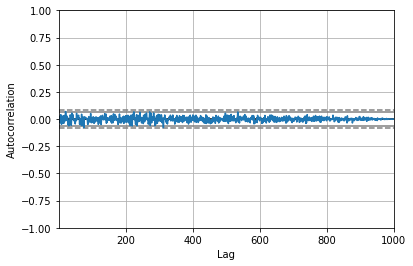

In [ ]:
from pandas.plotting import autocorrelation_plot
randval = np.random.randn(1000)
autocorrelation_plot(randval)
plt.show()

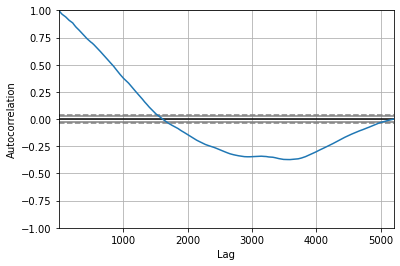

In [ ]:
autocorrelation_plot(Logreg["Lag1"])
plt.show()

In [ ]:
#Logreg1=pd.DataFrame(Logreg)

In [ ]:
#Logreg1.reset_index(inplace=True)

In [ ]:
#Logreg1['Date'] = pd.to_datetime(Logreg1['Date'])
#Logreg1['month_name'] = Logreg1['Date'].dt.month_name()
#Logreg1['day_name'] = Logreg1['Date'].dt.day_name()


In [ ]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#Logreg1['month_name']= label_encoder.fit_transform(Logreg1['month_name'])
#Logreg1['day_name']= label_encoder.fit_transform(Logreg1['day_name'])
 




In [ ]:
Logreg.groupby(["direction"]).count()

,Lag1,Lag2,roll,roll1
direction,,,,
-1,2523,2523,2523,2523
0,83,83,83,83
1,2596,2596,2596,2596


In [ ]:
class_0 = hein_hist.loc[(hein_hist['direction'] == 0)]
class_0.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,previous_date,direction
Date,,,,,,,,,,
2000-04-05,29.263590,29.956069,28.930175,29.314886,2265348,0.0,0,0.0,29.314886,0
2000-04-21,31.597486,31.597486,31.597486,31.597486,0,0.0,0,0.0,31.597486,0
2000-04-24,31.597486,31.597486,31.597486,31.597486,0,0.0,0,0.0,31.597486,0
2000-06-01,30.109945,30.212534,28.212044,28.237692,2123242,0.0,0,0.0,28.237692,0
2000-06-12,29.058422,29.058422,29.058422,29.058422,0,0.0,0,0.0,29.058422,0


In [ ]:
hein_hist['2000-12-09':'2000-12-14']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,previous_date,direction
Date,,,,,,,,,,
2000-12-11,31.443615,31.802676,30.751136,31.725735,1702738,0.0,0,0.018946,31.135849,1
2000-12-12,31.674441,31.879620,31.392319,31.725735,1746791,0.0,0,0.000000,31.725735,0
2000-12-13,31.751390,32.443867,31.058911,32.315632,2085647,0.0,0,0.018594,31.725735,1
2000-12-14,32.238693,32.572108,31.443627,31.623158,3123996,0.0,0,-0.021428,32.315632,-1


In [ ]:
X = Logreg[['Lag1', 'Lag2','roll','roll1']]

Y = Logreg['direction']


In [ ]:
Y.head()

Date
2000-10-11   -1
2000-10-12    0
2000-10-13    1
2000-10-16    0
2000-10-17   -1
Name: direction, dtype: category
Categories (3, int64): [-1, 0, 1]

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X= scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X , Y, train_size=0.7)

In [ ]:
#we will use multiclass logistic regression to solve our classification problems

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(x_train, y_train.values.ravel())

LogisticRegression(multi_class='multinomial')

In [ ]:
y_predlogreg = logreg.predict(x_test)
pd.DataFrame(y_predlogreg,columns=["Forecast"])

,Forecast
0,-1
1,-1
2,1
3,-1
4,1
...,...
1556,1
1557,1
1558,1
1559,1


In [ ]:
creportlogreg =pd.DataFrame(metrics.classification_report(y_test,y_predlogreg,output_dict=True)).transpose()
creportlogreg

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.475738,0.611111,0.534994,738.000000
0,0.000000,0.000000,0.000000,27.000000
1,0.525285,0.404523,0.457062,796.000000
accuracy,0.495195,0.495195,0.495195,0.495195
macro avg,0.333675,0.338545,0.330685,1561.000000
weighted avg,0.492775,0.495195,0.486000,1561.000000


In [ ]:
#considering our risk aversion, we value high precision rate. Logistic regression showed high precision rate. The F1 score is high for direction of price going up, which is the most important criteria for us. 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred_test = logreg.predict(x_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[451   0 287]
 [ 23   0   4]
 [474   0 322]]


In [ ]:
score = logreg.score(x_train, y_train)
print(score)

0.5089261191980226


In [ ]:
score = logreg.score(x_test, y_test)
print(score)

0.4951953875720692


In [ ]:
#Training the neural networks 

In [ ]:
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense, SimpleRNN

from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def baseline_model1(optimizer="adam"):
    model1 = Sequential()
    model1.add(Dense(8, input_dim=4, activation="sigmoid"))
    model1.add(Dense(3, activation="sigmoid"))
    model1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model1

In [ ]:
#As we have a multi class classification problem the output layer will create 3 output values, one for each class. We will  use a “softmax” activation function in the output layer to ensure that output values rae in the rnafe 0 to 1.we will have 8 neurons in the hidden layer 

In [ ]:
#def baseline_model1(optimizer="adam"):
    #model1 = Sequential()
    #model1.add(Dense(8, input_dim=4, activation="relu"))
    #model1.add(Dense(3, activation="tanh"))
    #model1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    #return model1

In [ ]:
#We used the ReLu function on the hidden layer and the output layer. Unlike the sigmoid function, the ReLu function limits the data between 0 and 1

In [ ]:
model1 = KerasClassifier(build_fn=baseline_model1, epochs=40, batch_size=32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
model1.fit(x_train, y_train)


Epoch 1/40
114/114 [==============================] - 1s 2ms/step - loss: 0.9015 - accuracy: 0.4902
Epoch 2/40
114/114 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.4892
Epoch 3/40
114/114 [==============================] - 0s 1ms/step - loss: 0.7815 - accuracy: 0.4924
Epoch 4/40
114/114 [==============================] - 0s 2ms/step - loss: 0.7706 - accuracy: 0.4968
Epoch 5/40
114/114 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.4966
Epoch 6/40
114/114 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.5037
Epoch 7/40
114/114 [==============================] - 0s 1ms/step - loss: 0.7622 - accuracy: 0.4960
Epoch 8/40
114/114 [==============================] - 0s 1ms/step - loss: 0.7614 - accuracy: 0.4993
Epoch 9/40
114/114 [==============================] - 0s 1ms/step - loss: 0.7611 - accuracy: 0.4999
Epoch 10/40
114/114 [==============================] - 0s 1ms/step - loss: 0.7609 - accuracy: 0.4993

In [ ]:
y_predmodel1 = model1.predict(x_test)
creportmodel1 = pd.DataFrame(metrics.classification_report(y_test,y_predmodel1, output_dict=True)).transpose()
creportmodel1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.478919,0.600271,0.532772,738.00000
0,0.000000,0.000000,0.000000,27.00000
1,0.529874,0.423367,0.470670,796.00000
accuracy,0.499680,0.499680,0.499680,0.49968
macro avg,0.336264,0.341213,0.334481,1561.00000
weighted avg,0.496619,0.499680,0.491889,1561.00000


In [ ]:
plt.plot(model1.model["loss"],color="red",label="Training Loss")
plt.plot(model1.model["val_loss"],color="green",label="Cross-Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

TypeError: ignored

In [ ]:
we can see that the neural networks are more accurate than the logistic classifier. 

Next, we'll plot the data so we can see how the stock price has changed over time.  This gives us another overview of the structure of the data.

In [ ]:
hein_hist.plot.line(y='Close', use_index=True)

## Preparing the data


Now, let's prepare the data so we can make predictions.  We'll be predicting if the price will go up or down tomorrow based on data from today.

First, we'll identify a target that we're trying to predict.  Our target will be if the price will go up or down tomorrow.  If the price went up, the target will be `1` and if it went down, the target will be `0`.

Next, we'll shift the data from previous days "forward" one day, so we can use it to predict the target price.  This ensures that we don't accidentally use data from the same day to make predictions! (a very common mistake)

Then, we'll combine both so we have our training data.

In [ ]:
# Ensure we know the actual closing price
data = hein_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = hein_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
hein_prev = hein_hist.copy()
hein_prev = hein_prev.shift(1)

In [ ]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(hein_prev[predictors]).iloc[1:]

In [ ]:
data.head(5)

## Creating a machine learning model

Next, we'll create a machine learning model to see how accurately we can predict the stock price.

Because we're dealing with time series data, we can't just use cross-validation to create predictions for the whole dataset.  This will cause leakage where data from the future will be used to predict past prices.  This doesn't match with the real world, and will make us think that our algorithm is much better than it actually is.

Instead, we'll split the data sequentially.  We'll start off by predicting just the last 100 rows using the other rows.

We'll use a random forest classifier to generate our predictions.  This is a good "default" model for a lot of applications, because it can pick up nonlinear relationships in the data, and is somewhat robust to overfitting with the right parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

# Create a train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

Next, we'll need to check how accurate the model was.  Earlier, we mentioned using `precision` to measure error.  We can do this by using the `precision_score` function from scikit-learn.

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

So our model is directionally accurate 42% of the time.  This is even worse than a coin flip!  We can take a deeper look at the individual predictions and the actuals, and see where we're off.

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

## Backtesting

Our model isn't great, but luckily we can still improve it.  Before we do that, let's figure out how to make predictions across the entire dataset, not just the last 100 rows.  This will give us a more robust error estimate.  The last 100 days may have has atypical market conditions or other issues that make error metrics on those days unrealistic for future predictions (which are what we really care about).

To do this, we'll need to backtest.  Backtesting ensures that we only use data from before the day that we're predicting.  If we use data from after the day we're predicting, the algorithm is unrealistic (in the real world, you won't be able to use future data to predict that past!).

Our backtesting method will loop over the dataset, and train a model every 750 rows.  We'll make it a function so we can avoid rewriting the code if we want to backtest again.

In the backtesting function, we will:

* Split the training and test data
* Train a model
* Make predictions on the test data using `predict_proba` - this is because we want to really optimize for true positives.  By default, the threshold for splitting 0/1 is .5, but we can set it to different values to tweak the precision.  If we set it too high, we'll make fewer trades, but will have a lower potential for losses.

In [ ]:
def backtest(data, model, predictors, start=1000, step=100):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the random forest model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]  #generates a 2 column array with probabilities for 0, 1 we only need the second column, hence why we are dropping the first 
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In [ ]:
predictions = backtest(data, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

As you can see, we're only making 257 trades.  This is because we used `.6` as a threshold for trading.

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

## Improving accuracy

The model isn't very accurate, but at least now we can make predictions across the entire history of the stock.  For this model to be useful, we have to get it to predict more accurately.

Let's add some more predictors to see if we can improve accuracy.

We'll add in some rolling means, so the model can evaluate the current price against recent prices.  We'll also look at the ratios between different indicators.

In [ ]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [ ]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend
#helps the algorithm understand where today fits in a larger trend
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [ ]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]

In [ ]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

In [ ]:
predictions.iloc[-100:].plot()